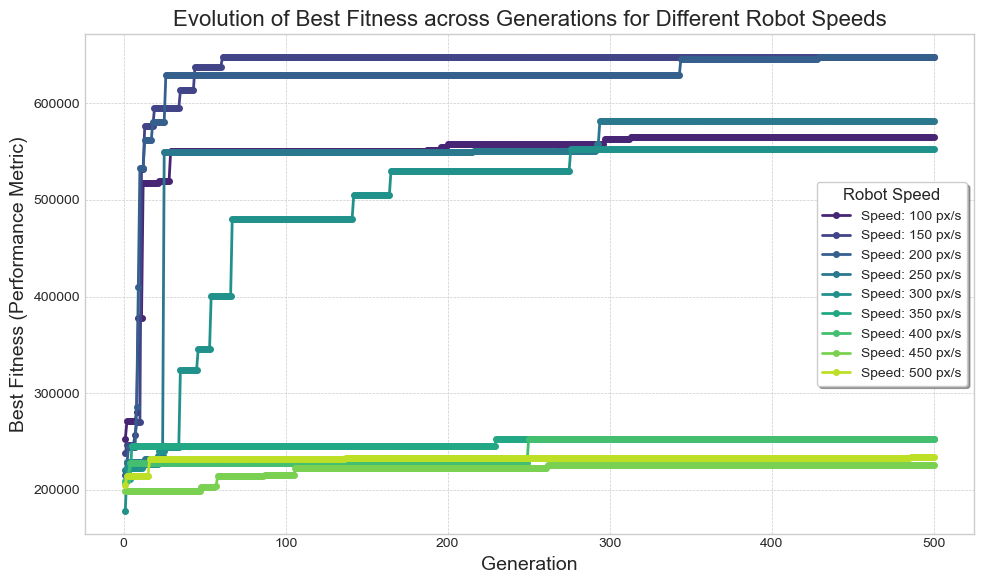

In [128]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns # Import seaborn for enhanced aesthetics

# --- Configuration for Publication-Ready Plots ---
# These settings improve readability and appearance for academic papers.
plt.rcParams.update({
    'font.size': 12,           # Base font size
    'axes.labelsize': 14,      # Font size for x and y labels
    'xtick.labelsize': 10,     # Font size for x-axis ticks
    'ytick.labelsize': 10,     # Font size for y-axis ticks
    'legend.fontsize': 10,     # Font size for the legend
    'axes.titlesize': 16,      # Font size for the plot title
    'figure.figsize': (10, 6), # Figure size in inches (adjust as needed)
    'lines.linewidth': 2,      # Line width for better visibility
    'grid.linestyle': '--',    # Dashed grid lines
    'grid.linewidth': 0.7,     # Thinner grid lines
    'axes.edgecolor': '0.2',   # Darker axes lines
    'axes.labelcolor': '0.15', # Darker label color
    'xtick.color': '0.15',     # Darker x-tick color
    'ytick.color': '0.15',     # Darker y-tick color
})

# Use a clean Seaborn style for enhanced aesthetics
sns.set_style("whitegrid")

# --- Load Your Data Files ---
# This script assumes your data files are organized in directories
# named after their respective speeds (e.g., '100/', '200/').

data_frames_to_plot = []
speeds = [100, 150, 200, 250, 300, 350, 400, 450, 500] # Define the speeds to load

for speed in speeds:
    try:
        df = pd.read_csv(f'../neat_results/{speed}/statistics/generation_fitness_stats.csv')
        df['speed'] = speed
        data_frames_to_plot.append(df)
    except FileNotFoundError:
        print(f"Warning: Data file not found for speed {speed}. Skipping.")

# --- Combine all available data into a single DataFrame ---
if not data_frames_to_plot:
    print("Error: No data files loaded. Please ensure your CSV files are in the correct directories (e.g., '100/generation_fitness_stats.csv').")
else:
    all_data = pd.concat(data_frames_to_plot, ignore_index=True)

    # --- Plotting the data ---
    fig, ax = plt.subplots() # Use fig, ax = plt.subplots() for object-oriented approach

    # Plot best fitness for each speed found in the combined data
    # Use a color palette for distinct lines
    palette = sns.color_palette("viridis", n_colors=len(all_data['speed'].unique()))
    for i, speed in enumerate(sorted(all_data['speed'].unique())):
        speed_data = all_data[all_data['speed'] == speed]
        ax.plot(speed_data['generation'], speed_data['best_fitness'],
                marker='o', markersize=4, linestyle='-',
                color=palette[i], label=f'Speed: {speed} px/s') # Add units to label

    # --- Customize the plot for research papers ---
    ax.set_title('Evolution of Best Fitness across Generations for Different Robot Speeds')
    ax.set_xlabel('Generation')
    ax.set_ylabel('Best Fitness (Performance Metric)') # More descriptive Y-axis label
    ax.legend(title='Robot Speed', loc='center right', frameon=True, shadow=True) # Better legend placement and appearance
    ax.grid(True, which='both', linestyle='--', linewidth=0.5) # Ensure grid is visible
    plt.tight_layout() # Adjusts plot parameters for a tight layout
    
    # Save the figure to a high-resolution file
    plt.savefig('neat_fitness_evolution.png', dpi=300, bbox_inches='tight')
    # For vector graphics (ideal for papers):
    # plt.savefig('neat_fitness_evolution.pdf', bbox_inches='tight') 

    plt.show()